In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [90]:
df=pd.read_csv('c:/data/Customer Churn.csv')

In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#Replace Blank with 0 as tenure is 0 and no total charges are recorded

In [55]:
df['TotalCharges']=df['TotalCharges'].replace(' ','0')
df['TotalCharges']=df['TotalCharges'].astype('float')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
#Entire Row Basis
df.duplicated().sum()

np.int64(0)

In [11]:
#Unique id Base Duplicate value Check

In [12]:
df['customerID'].duplicated().sum()

np.int64(0)

In [20]:
#converted 0 and 1 values of senior citizen to yes/no to make it esay to understand

In [56]:
def conv(value):
    if value==1:
        return 'yes'
    elif value==0:
        return 'no'

In [57]:
df['SeniorCitizen']=df['SeniorCitizen'].map(conv)#apply(conv)

In [18]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


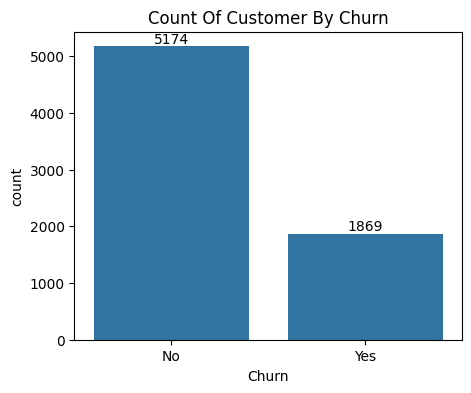

In [39]:
plt.figure(figsize=(5,4))
ax=sns.countplot(data=df,x='Churn')
ax.bar_label(ax.containers[0])
plt.title('Count Of Customer By Churn')
plt.show()

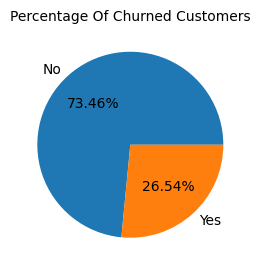

In [38]:
gb=df.groupby('Churn').agg({'Churn':'count'})
plt.figure(figsize=(3,4))
plt.pie(gb['Churn'],labels=gb.index,autopct='%1.2f%%')
plt.title('Percentage Of Churned Customers',fontsize=10)
plt.show()

#from the given pie chart we can conclude that 26.54% of our customer have churned out
#not let's explore the reason behind it

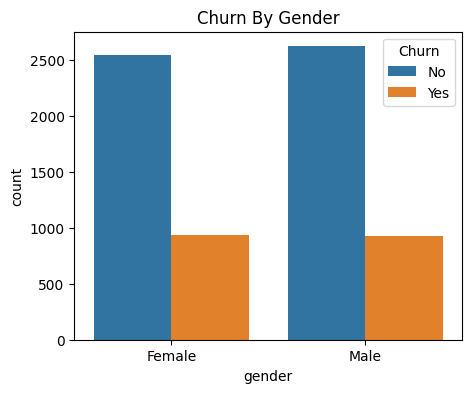

In [45]:
plt.figure(figsize=(5,4))
sns.countplot(data=df,x='gender',hue='Churn')
plt.title('Churn By Gender')
plt.show()

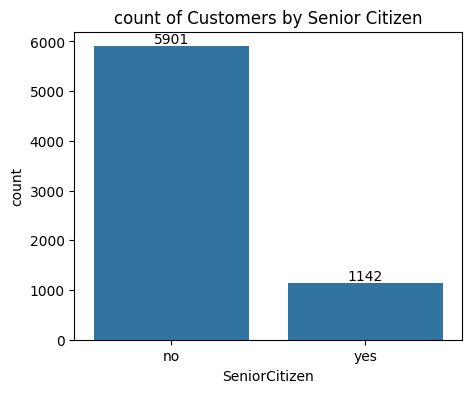

In [60]:
plt.figure(figsize=(5,4))
ax=sns.countplot(data=df,x='SeniorCitizen')
ax.bar_label(ax.containers[0])
plt.title('count of Customers by Senior Citizen')
plt.show()

#comparative a Greated percentage of People in senior citizen category have churned

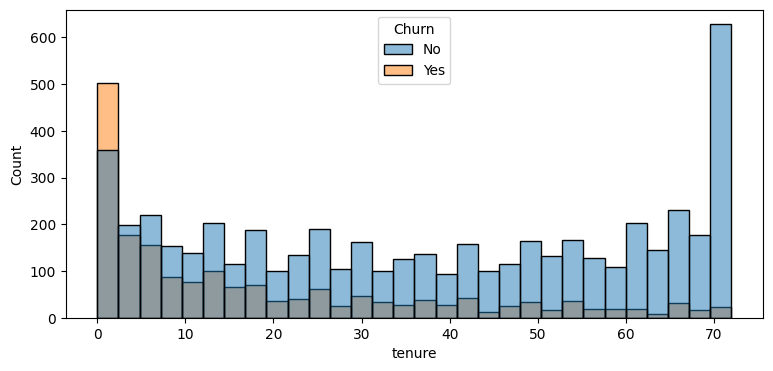

In [65]:
plt.figure(figsize=(9,4))
sns.histplot(x='tenure',data=df,bins=30,hue='Churn')
plt.show()

#people who have used our services for a long time have stayed and people who have used our services 1 or 2 month have churned

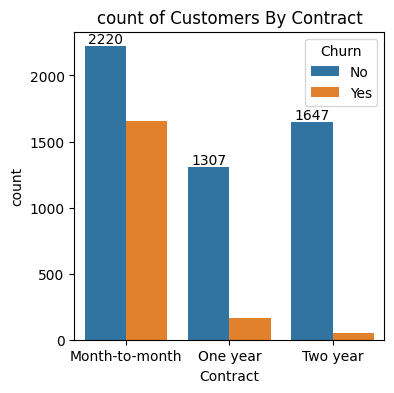

In [70]:
plt.figure(figsize=(4,4))
ax=sns.countplot(data=df,x='Contract',hue='Churn')
ax.bar_label(ax.containers[0])
plt.title('count of Customers By Contract')
plt.show()

#people who have month to month contract are likely to churn then from those who have 1 or 2 year contract

In [74]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

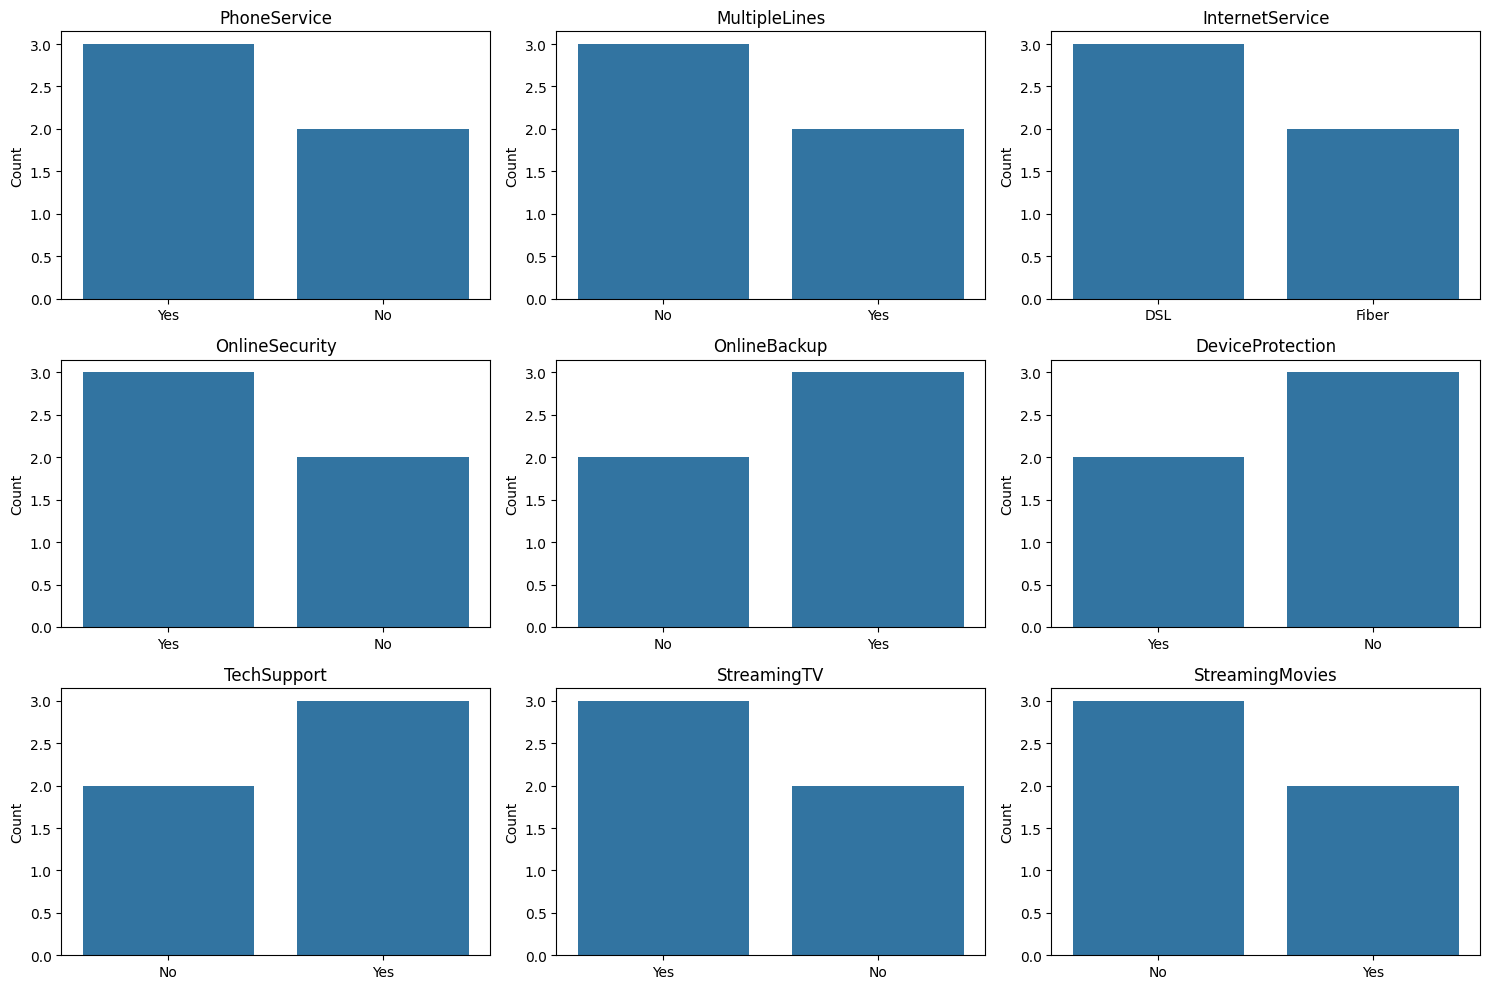

In [84]:
 
# Set up the subplot grid
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Create count plots
for i, column in enumerate(columns):
    sns.countplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()



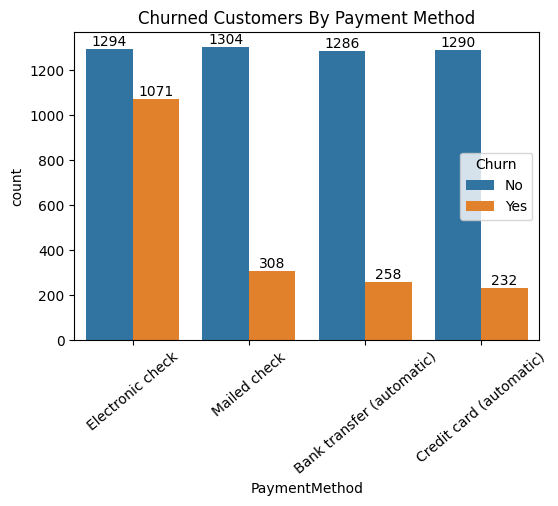

In [96]:
plt.figure(figsize=(6,4))
ax=sns.countplot(data=df,x='PaymentMethod',hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Churned Customers By Payment Method')
plt.xticks(rotation=40)
plt.show()

In [89]:
#customer is likely to churn when he is useing electronic checkas a payment method

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,Yes,No,DSL,Yes,No,Yes,No,Yes,No
1,No,Yes,Fiber,No,Yes,No,Yes,No,Yes
